## 例6-1 scikit-learn数字数据集（MNIST 数据集的一个子集）的主成分分析

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [3]:
# Load the data
# 载入数据
digits_data = datasets.load_digits()
n = len(digits_data.images)

# Each image is represented as an 8-by-8 array. Flatten this array as input to PCA.
# 每张图像被表示为一个8×8数组。将数组扁平化，作为PCA的输入
image_data = digits_data.images.reshape((n, -1))
image_data.shape

(1797, 64)

In [25]:
digits_data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [27]:
digits_data.target[0]

0

In [28]:
digits_data.data.shape

(1797, 64)

In [6]:
# Fit a PCA transformer to the dataset.
# 为这个数据集拟合一个PCA转换器
# The number of components is automatically chosen to account for at least 80% of the total variance.
# 自动选择主成分的数目，使主成分能解释至少80%原来的方差
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [10]:
len(pca_transformer.explained_variance_ratio_)

13

In [12]:
pca_images.shape

(1797, 13)

In [8]:
pca_transformer.explained_variance_ratio_[:3].sum()

0.40303958587675115

In [13]:
# Groundtruth label of the number appearing in each image
# 每张片的标签
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
# 结果可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

Text(0.5, 0, 'Principal component 3')

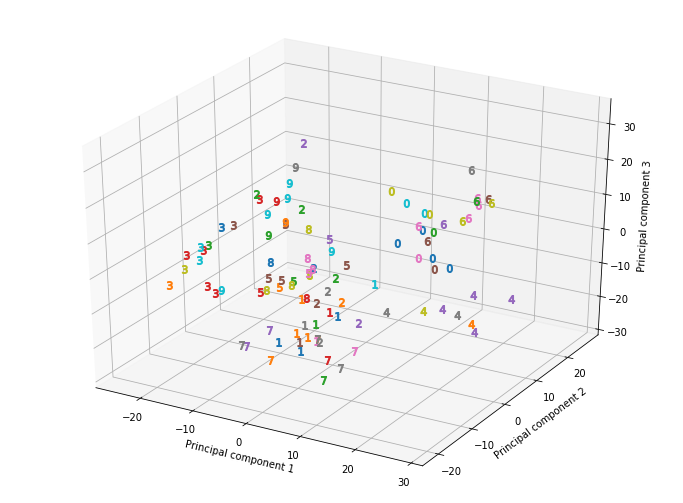

In [29]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2], marker=r'${}$'.format(labels[i]), s=64)
    
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')